Encoding done to minimise the impact of outliers on the performance

How to process Outlier?

- Mean median imputation
- Discretization (grouping of the variables in buckets)
- Ignoring (Triming -removal of the extreme values )
- Encoding ( windsorization )
    Top: all values above the upper band will be arbitrarily set to the upper band.
    Bottom: all values below a certain threshold, are capped at that threshold.
    Zero: If bottom thresh-hold is zero, all are set to zero 

How to Identify outliers?

- Extreme Value Analysis of 1-dimensional data
  (the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the   standard deviation)
 

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

Text(0, 0.5, 'Number of Passengers')

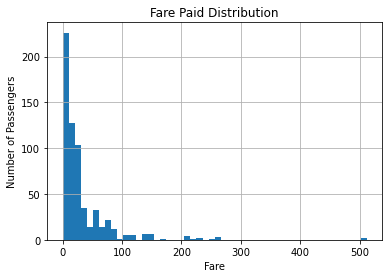

In [4]:
fig = X_train.Fare.hist(bins=50)
fig.set_title('Fare Paid Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

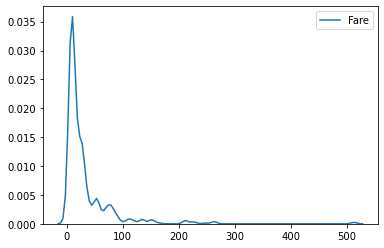

In [5]:
sns.kdeplot(X_train.Fare)

Text(0, 0.5, 'Number of Passengers')

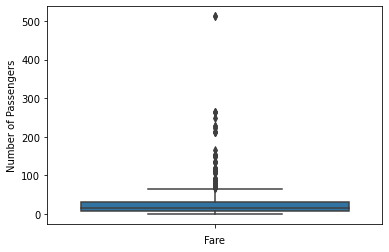

In [6]:
fig = sns.boxplot(y='Fare', data=X_train)
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

In [7]:
X_train.Fare.describe()

count    623.000000
mean      32.458273
std       48.257658
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      512.329200
Name: Fare, dtype: float64

In [8]:
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Upper_fence = X_train.Fare.quantile(0.75) + (IQR * 3)
Upper_fence

100.6563

In [9]:
print('total passengers: {}'.format(X_train.shape[0]))
print('passengers that paid more than 100: {}'.format(X_train[X_train.Fare>100].shape[0]))
print('percentage of outliers: {}'.format(X_train[X_train.Fare>100].shape[0]/np.float(X_train.shape[0])))

total passengers: 623
passengers that paid more than 100: 36
percentage of outliers: 0.05778491171749599


##### Top Coding

In [10]:
X_train.loc[X_train.Fare>100, 'Fare'] = 100
X_test.loc[X_test.Fare>100, 'Fare'] = 100
X_train.Fare.max(), X_test.Fare.max()

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(100.0, 100.0)

In [11]:
X_train[X_train.Fare==0].shape

(7, 12)

In [12]:
X_train[X_train.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


In [13]:
X_train[X_train.Fare!=0]['Fare'].min()

5.0

Text(0, 0.5, 'Number of Passengers')

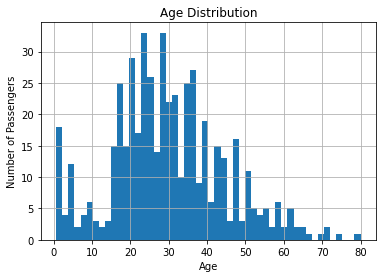

In [14]:
fig = X_train.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


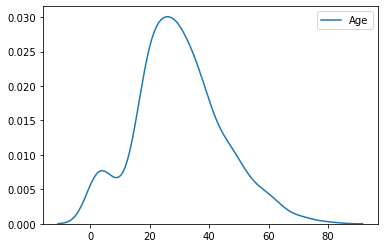

In [15]:
sns.kdeplot(X_train.Age)

Text(0, 0.5, 'Number of Passengers')

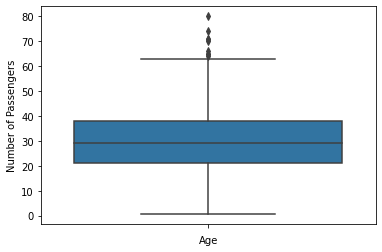

In [16]:
fig = sns.boxplot(y='Age', data=X_train)
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Observation: Outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding.

In [17]:
X_train.Age.describe()

count    502.000000
mean      29.915339
std       14.506994
min        0.670000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
Upper_boundary = X_train.Age.mean() + 3* X_train.Age.std()
Upper_boundary

73.43632005918366

In [19]:
total_passengers = np.float(X_train.shape[0])
total_passengers

623.0

In [20]:
print('total passengers: {}'.format(X_train.Age.dropna().shape[0]/total_passengers))

total passengers: 0.8057784911717496


In [21]:
a = X_train.Age.dropna().shape[0]

In [22]:
a

502

In [23]:
a/623

0.8057784911717496

In [24]:
print('passengers older than 73 (Gaussian app): {}'.format(X_train[X_train.Age>73].shape[0]/total_passengers))

passengers older than 73 (Gaussian app): 0.0032102728731942215


In [25]:
X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73
X_train.Age.max(), X_test.Age.max()

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(73.0, 70.5)

Observation: Test set has no outliers,